<a href="https://colab.research.google.com/github/Feven-Belay/OIBSIP/blob/main/Email%20Spam%20Detection%20with%20Machine%20Learning/Email_Spam_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Email Spam Detection with Machine Learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

# 1. 1. Download and Load the Dataset
First, download the dataset and load it into a pandas DataFrame. If you encounter encoding issues, specify a different encoding.

In [3]:
import pandas as pd

# Load the dataset with a different encoding
spam = pd.read_csv("/content/spam.csv", encoding='latin1')

# Display the first few rows of the dataset
spam.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 2. Data Preprocessing
Clean the data and handle any missing values or incorrect data types. Drop unnecessary columns and rename the useful ones.

In [4]:
# Drop unnamed columns
spam = spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])




In [5]:
# Rename the columns
spam.columns = ['label', 'text']



In [6]:
# Check for missing values
print(spam.isnull().sum())



label    0
text     0
dtype: int64


In [7]:
# Drop rows with missing values
spam.dropna(inplace=True)


In [8]:

# Check the first few rows of the cleaned dataset
print(spam.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# 3. Exploratory Data Analysis (EDA)
Perform EDA to understand the relationships between features and the target variable.

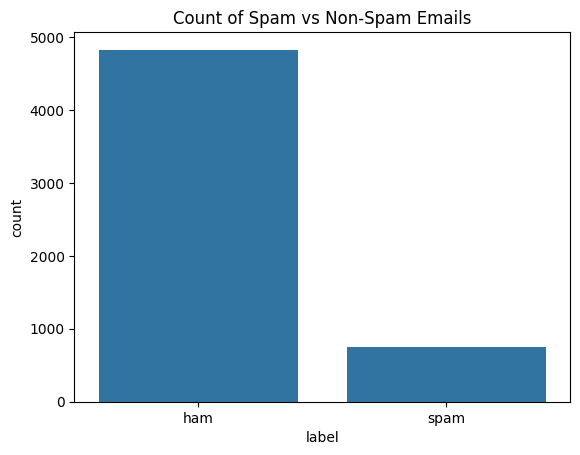

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable
sns.countplot(x='label', data=spam)
plt.title('Count of Spam vs Non-Spam Emails')
plt.show()



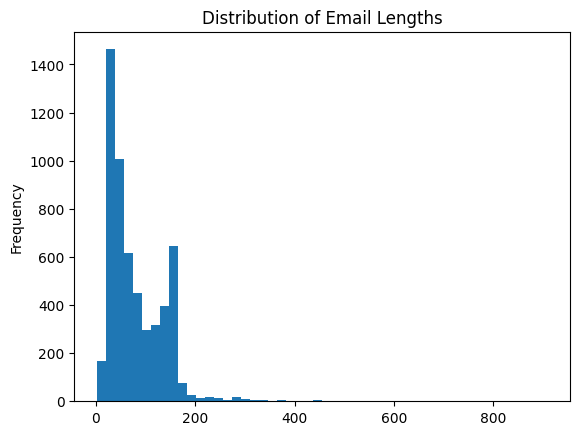

In [10]:
# Length of emails
spam['length'] = spam['text'].apply(len)
spam['length'].plot(bins=50, kind='hist')
plt.title('Distribution of Email Lengths')
plt.show()


# 4. Feature Engineering
Create new features if necessary and prepare the data for model training.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and target
X = spam['text']
y = spam['label']

# Convert text data to numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)


# 5. Split the Data
Split the dataset into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Train the Model
Choose a classification model and train it on the training data.


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   0]
 [ 35 115]]
